##  Logistic Regression
- https://harvard-iacs.github.io/2018-CS109A/lectures/lecture-10/demo/
- ``` MODEL.get_params() ``` gives the list of parameters in the results of the model

In [275]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

%matplotlib inline


In [230]:
df_heart = pd.read_csv('./data/heart.csv')
df_heart.shape 
df_heart.head()      

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


### Predict AHD from Max HR

Text(0, 0.5, 'AHD')

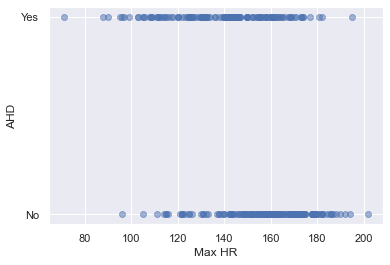

In [144]:
plt.plot(df_heart.MaxHR, df_heart.AHD, 'o', alpha = .5)
plt.xlabel("Max HR")
plt.ylabel("AHD")

Score or Accuracy =  0.7704918032786885
Estimated beta1:  [[-0.04008727]]
Estimated beta0:  [5.86670118]
For one unit increase in maxHD the log(odds) of heart diseases increases by [0.9607056]

Confusion Matrix 
 [[27  8]
 [ 6 20]]


Text(0, 0.5, 'Hear Disease')

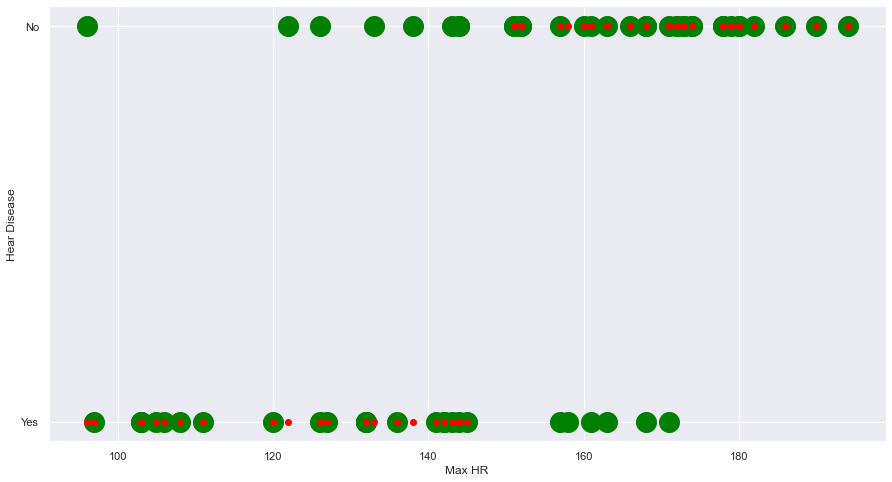

In [175]:
np.random.seed(22)
# Split into train and test sets
Xtrain, Xtest, ytrain, ytest = train_test_split(df_heart['MaxHR'].values.reshape(-1,1),
                                                df_heart['AHD'], 
                                                test_size = 0.2)

# create model
logreg = LogisticRegression()

# fit model
logreg.fit(Xtrain, ytrain);

# test model
score = logreg.score(Xtest, ytest)
print("Score or Accuracy = ", score)

# Coefficients
print('Estimated beta1: ', logreg.coef_)
print('Estimated beta0: ', logreg.intercept_)
print('For one unit increase in maxHD the log(odds) of heart diseases increases by', np.exp(logreg.coef_[0]))

# predict y values
pred_y = logreg.predict(Xtest)
conf_matrix = confusion_matrix(ytest, pred_y)
print('\nConfusion Matrix \n', conf_matrix)

# plot results
plt.figure(figsize=(15,8))
plt.plot(np.sort(Xtest), ytest, 'o', alpha = 1, color = 'green', markersize = 20)
plt.plot(np.sort(Xtest), pred_y, 'o', alpha = 1, color = 'red')
plt.xlabel("Max HR")
plt.ylabel("Hear Disease")

### Multi logistic Regression

In [197]:
np.random.seed(22)
# Split into train and test sets
Xtrain, Xtest, ytrain, ytest = train_test_split(df_heart[['MaxHR', 'Sex']],
                                                df_heart['AHD'], 
                                                test_size = 0.2)

# create model
logreg = LogisticRegression()

# fit model
logreg.fit(Xtrain, ytrain);

# test model
score = logreg.score(Xtest, ytest)
print("Score or Accuracy = ", score)

# Coefficients
print('Estimated beta1: ', logreg.coef_)
print('Estimated beta0: ', logreg.intercept_)
print('log(odds) of heart diseases for male is', np.exp(logreg.coef_.item(1)), "more than that for female")


# predict y values
pred_y = logreg.predict(Xtest)
conf_matrix = confusion_matrix(ytest, pred_y)
print('\nConfusion Matrix \n', conf_matrix)

Score or Accuracy =  0.7540983606557377
Estimated beta1:  [[-0.04047751  1.16013526]]
Estimated beta0:  [5.13227087]
log(odds) of heart diseases for male is 3.1903647705885345 more than that for female

Confusion Matrix 
 [[27  8]
 [ 7 19]]


###  Convert AHD into 1s and 0s

In [220]:
data_x = df_heart.Sex.values
data_y = df_heart.AHD.map(lambda x:0 if x == 'No' else 1).values

print("% women = ", sum(df_heart['Sex'] == 0)/df_heart['Sex'].shape[0])
print("% men = ", sum(df_heart['Sex'] == 1)/df_heart['Sex'].shape[0])
print("\n")

logreg.fit(data_x.reshape(-1,1), data_y);

print('Estimated beta1: ', logreg.coef_)
print('Estimated beta0: ', logreg.intercept_)



% women =  0.3201320132013201
% men =  0.6798679867986799


Estimated beta1:  [[1.18597443]]
Estimated beta0:  [-0.99483151]


### With more than 2 categories

In [249]:
party_df = pd.read_csv('./data/gsspartyid.csv')
party_df.head()
#print(party_df['politicalparty'].value_counts())

,politicalparty,income,educ,abortion,republican
0,Republican,2152,9,0,1
1,Republican,906,6,0,1
2,Democrat,1373,6,0,0
3,Democrat,1941,4,0,0
4,Democrat,355,7,0,0


In [266]:
party_df['logincome'] = np.log(party_df['income'])
train_x = party_df[['logincome', 'educ', 'abortion']]
train_y = party_df['republican']

logitm = LogisticRegression(C = 10000000)

logitm.fit(train_x, train_y);

print('Estimated beta1: ', logitm.coef_)
print('Estimated beta0: ', logitm.intercept_)


Estimated beta1:  [[-0.02351597 -0.01273136 -1.00384789]]
Estimated beta0:  [0.30520363]


In [320]:
# Predict probabilities and build confusion matrix

yhat = logitm.predict_proba(train_x) # gives prob of repub = 1 or 0
yhat = yhat[:,1]  # get only the second col that gives prob of republican
yhat

array([0.50253905, 0.51716683, 0.51472534, ..., 0.28452455, 0.27767379,
       0.27906997])

In [321]:
import sklearn.metrics as met

# confusion_matrix(actual, pred)
# Columns are for predicted (0,1) and rows are observed (0,1)

print(met.confusion_matrix(train_y, yhat > 0.5))
print(met.confusion_matrix(train_y, yhat > 0.4)) # increases # classified as Rs
print(met.confusion_matrix(train_y, yhat > 0.7)) # decreases # classified as R


[[478 297]
 [207 325]]
[[430 345]
 [166 366]]
[[775   0]
 [532   0]]


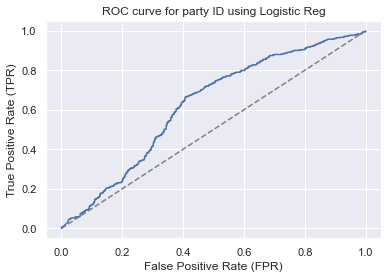

In [322]:
# ROC curve

fpr, tpr, threshold = met.roc_curve(train_y, yhat)

x = np.arange(0,1,0.01)

plt.plot(x , x, '--', color = 'gray')
plt.plot(fpr, tpr)
plt.title("ROC curve for party ID using Logistic Reg")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")

